In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam

import shutil
from sklearn.model_selection import train_test_split

In [2]:
train_path="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid_path="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
test_path="../input/new-plant-diseases-dataset/test/"

In [3]:
image_path="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"

In [4]:
class_names = os.listdir(image_path)
print(class_names)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

# Data Splitting

In [5]:
# Creating New Directories
os.makedirs("/kaggle/working/train", exist_ok=True)
os.makedirs("/kaggle/working/valid", exist_ok=True)
os.makedirs("/kaggle/working/test", exist_ok=True)

new_train_dir = "/kaggle/working/train"
new_valid_dir = "/kaggle/working/valid"
new_test_dir = "/kaggle/working/test"

In [6]:
# Copying the vaild data into a test directory
for class_folder in os.listdir(valid_path):
    src_class_dir = os.path.join(valid_path, class_folder)
    dest_class_dir = os.path.join(new_test_dir, class_folder)
    os.makedirs(dest_class_dir, exist_ok=True)
    
    for filename in os.listdir(src_class_dir):
        src_file = os.path.join(src_class_dir, filename)
        dest_file = os.path.join(dest_class_dir, filename)
        shutil.copy(src_file, dest_file)

In [7]:
# Splitting the Training Data into 80% Training and 20% Validation
for class_folder in os.listdir(train_path):
    src_class_dir = os.path.join(train_path, class_folder)
    dest_train_class_dir = os.path.join(new_train_dir, class_folder)
    dest_valid_class_dir = os.path.join(new_valid_dir, class_folder)
    os.makedirs(dest_train_class_dir, exist_ok=True)
    os.makedirs(dest_valid_class_dir, exist_ok=True)
    
    # List all image files in the class folder
    images = os.listdir(src_class_dir)
    train_images, valid_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Copy 80% of images to the new train folder
    for img in train_images:
        src_file = os.path.join(src_class_dir, img)
        dest_file = os.path.join(dest_train_class_dir, img)
        shutil.copy(src_file, dest_file)
    
    # Copy 20% of images to the new valid folder
    for img in valid_images:
        src_file = os.path.join(src_class_dir, img)
        dest_file = os.path.join(dest_valid_class_dir, img)
        shutil.copy(src_file, dest_file)

In [8]:
# making sure of the data
diseases_train2 = os.listdir(new_train_dir)
diseases_valid2 = os.listdir(new_valid_dir)
diseases_test = os.listdir(new_test_dir)
diseases = os.listdir(train_path)
nums = {}
print("Total disease classes in train are: {}".format(len(diseases_train2)))
print("Total disease classes in valid are: {}".format(len(diseases_valid2)))
print("Total disease classes in test are: {}".format(len(diseases_test)))

print("======================================")
# Comparing the number of images
for disease in diseases:
    nums[disease] = len(os.listdir(valid_path + '/' + disease))

n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images in valid")

# new dir
for disease in diseases:
    nums[disease] = len(os.listdir(new_test_dir + '/' + disease))

n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for testing")


print("======================================")

for disease in diseases:
    nums[disease] = len(os.listdir(train_path + '/' + disease))

n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images in train folder")

for disease in diseases:
    nums[disease] = len(os.listdir(new_train_dir + '/' + disease))

n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

for disease in diseases:
    nums[disease] = len(os.listdir(new_valid_dir + '/' + disease))

n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for vaildation")

Total disease classes in train are: 38
Total disease classes in valid are: 38
Total disease classes in test are: 38
There are 17572 images in valid
There are 17572 images for testing
There are 70295 images in train folder
There are 56219 images for training
There are 14076 images for vaildation


In [9]:
train_path_new="/kaggle/working/train"
valid_path_new="/kaggle/working/valid"
test_path_new="/kaggle/working/test"

In [10]:
batch_size=20

In [11]:
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest')

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [12]:
train_data_generator=traindata_generator.flow_from_directory(
    train_path_new,batch_size=batch_size,class_mode="categorical",
    target_size=(224,224),color_mode="rgb",shuffle=True )

Found 56219 images belonging to 38 classes.


In [13]:
valid_data_generator=validdata_generator.flow_from_directory(
    valid_path_new,batch_size=batch_size,class_mode="categorical",
    target_size=(224,224),color_mode="rgb",shuffle=True)

Found 14076 images belonging to 38 classes.


In [14]:
test_data_generator=testdata_generator.flow_from_directory(
    test_path_new,batch_size=batch_size,class_mode="categorical",
    target_size=(224,224),color_mode="rgb",shuffle=False )

Found 17572 images belonging to 38 classes.


In [15]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [16]:
train_number=train_data_generator.samples
valid_number=valid_data_generator.samples
test_number=test_data_generator.samples

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # import needed layers


# create a model with sequential class
model = Sequential()
model.add(Input(shape=(224, 224, 3)))  # Add Input layer first

# First convolutional layer: has 32 filters, each of size 3x3.
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer: has 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer: has 128 filters
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Output layer for 38 classes
model.add(Dense(38, activation='softmax'))

# Compile the CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to inspect the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    88,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,245,286 (340.44 MB)

 Trainable params: 89,244,262 (340.44 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [18]:
# Early stopping callback
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', mode='max', verbose=1, patience=50, 
    baseline=0.4, min_delta=0.0001, restore_best_weights=False
)

In [19]:
# batch_size=20
history= model.fit(train_data_generator, 
                   steps_per_epoch=train_number//batch_size, 
                   validation_data= valid_data_generator, 
                   validation_steps= valid_number//batch_size,
                   shuffle=True,
                   epochs =10,
                   batch_size = batch_size,
                   callbacks=[callback])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2810/2810 ━━━━━━━━━━━━━━━━━━━━ 5967s 2s/step - accuracy: 0.0830 - loss: 3.7961 - val_accuracy: 0.1775 - val_loss: 2.9787
Epoch 2/10
   1/2810 ━━━━━━━━━━━━━━━━━━━━ 1:28:03 2s/step - accuracy: 0.1000 - loss: 3.4953

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2810/2810 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.1000 - loss: 3.4953 - val_accuracy: 0.0625 - val_loss: 3.6305
Epoch 3/10
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 5993s 2s/step - accuracy: 0.2144 - loss: 2.7418 - val_accuracy: 0.0523 - val_loss: 5.5243
Epoch 4/10
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 2s 122us/step - accuracy: 0.0000e+00 - loss: 3.4515 - val_accuracy: 0.0000e+00 - val_loss: 5.3841
Epoch 5/10
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 6003s 2s/step - accuracy: 0.2407 - loss: 2.6551 - val_accuracy: 0.1818 - val_loss: 2.8461
Epoch 6/10
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 2s 108us/step - accuracy: 0.2500 - loss: 2.7619 - val_accuracy: 0.1250 - val_loss: 3.0450
Epoch 7/10
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 6021s 2s/step - accuracy: 0.2299 - loss: 2.6912 - val_accuracy: 0.5289 - val_loss: 1.5744
Epoch 8/10
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 2s 110us/step - accuracy: 0.5500 - loss: 1.5126 - val_accuracy: 0.5000 - val_loss: 1.2575
Epoch 9/10
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 6020s 2s/step - accuracy: 0.3544 - loss

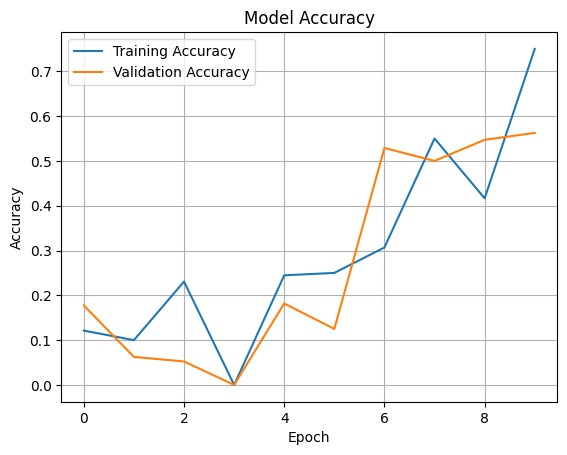

In [20]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
def plot_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Plot accuracy using the history object
plot_accuracy(history)


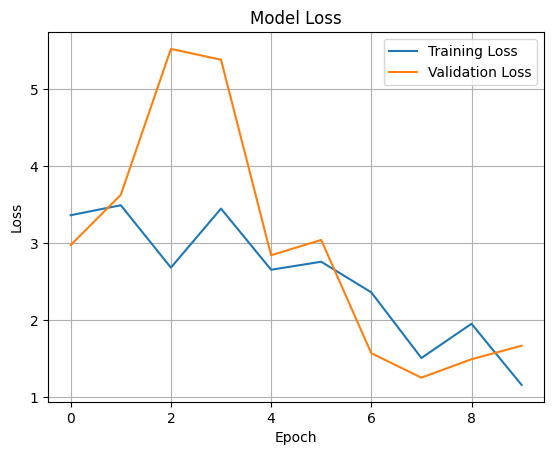

In [21]:
import matplotlib.pyplot as plt

# Summarize history for loss
def plot_loss(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Plot loss using the history object
plot_loss(history)


Save And Load Model

In [22]:
batch_size=20
pred=model.predict(test_data_generator,steps=None)
final_predict=np.argmax(pred,axis=1)
true_data=test_data_generator.classes

879/879 ━━━━━━━━━━━━━━━━━━━━ 327s 371ms/step


In [23]:
print("Length of true_data:", len(true_data))
print("Length of final_predict:", len(final_predict))


Length of true_data: 17572
Length of final_predict: 17572


In [24]:
print("Accuracy Score is",accuracy_score(true_data,final_predict))

Accuracy Score is 0.5349988618256317


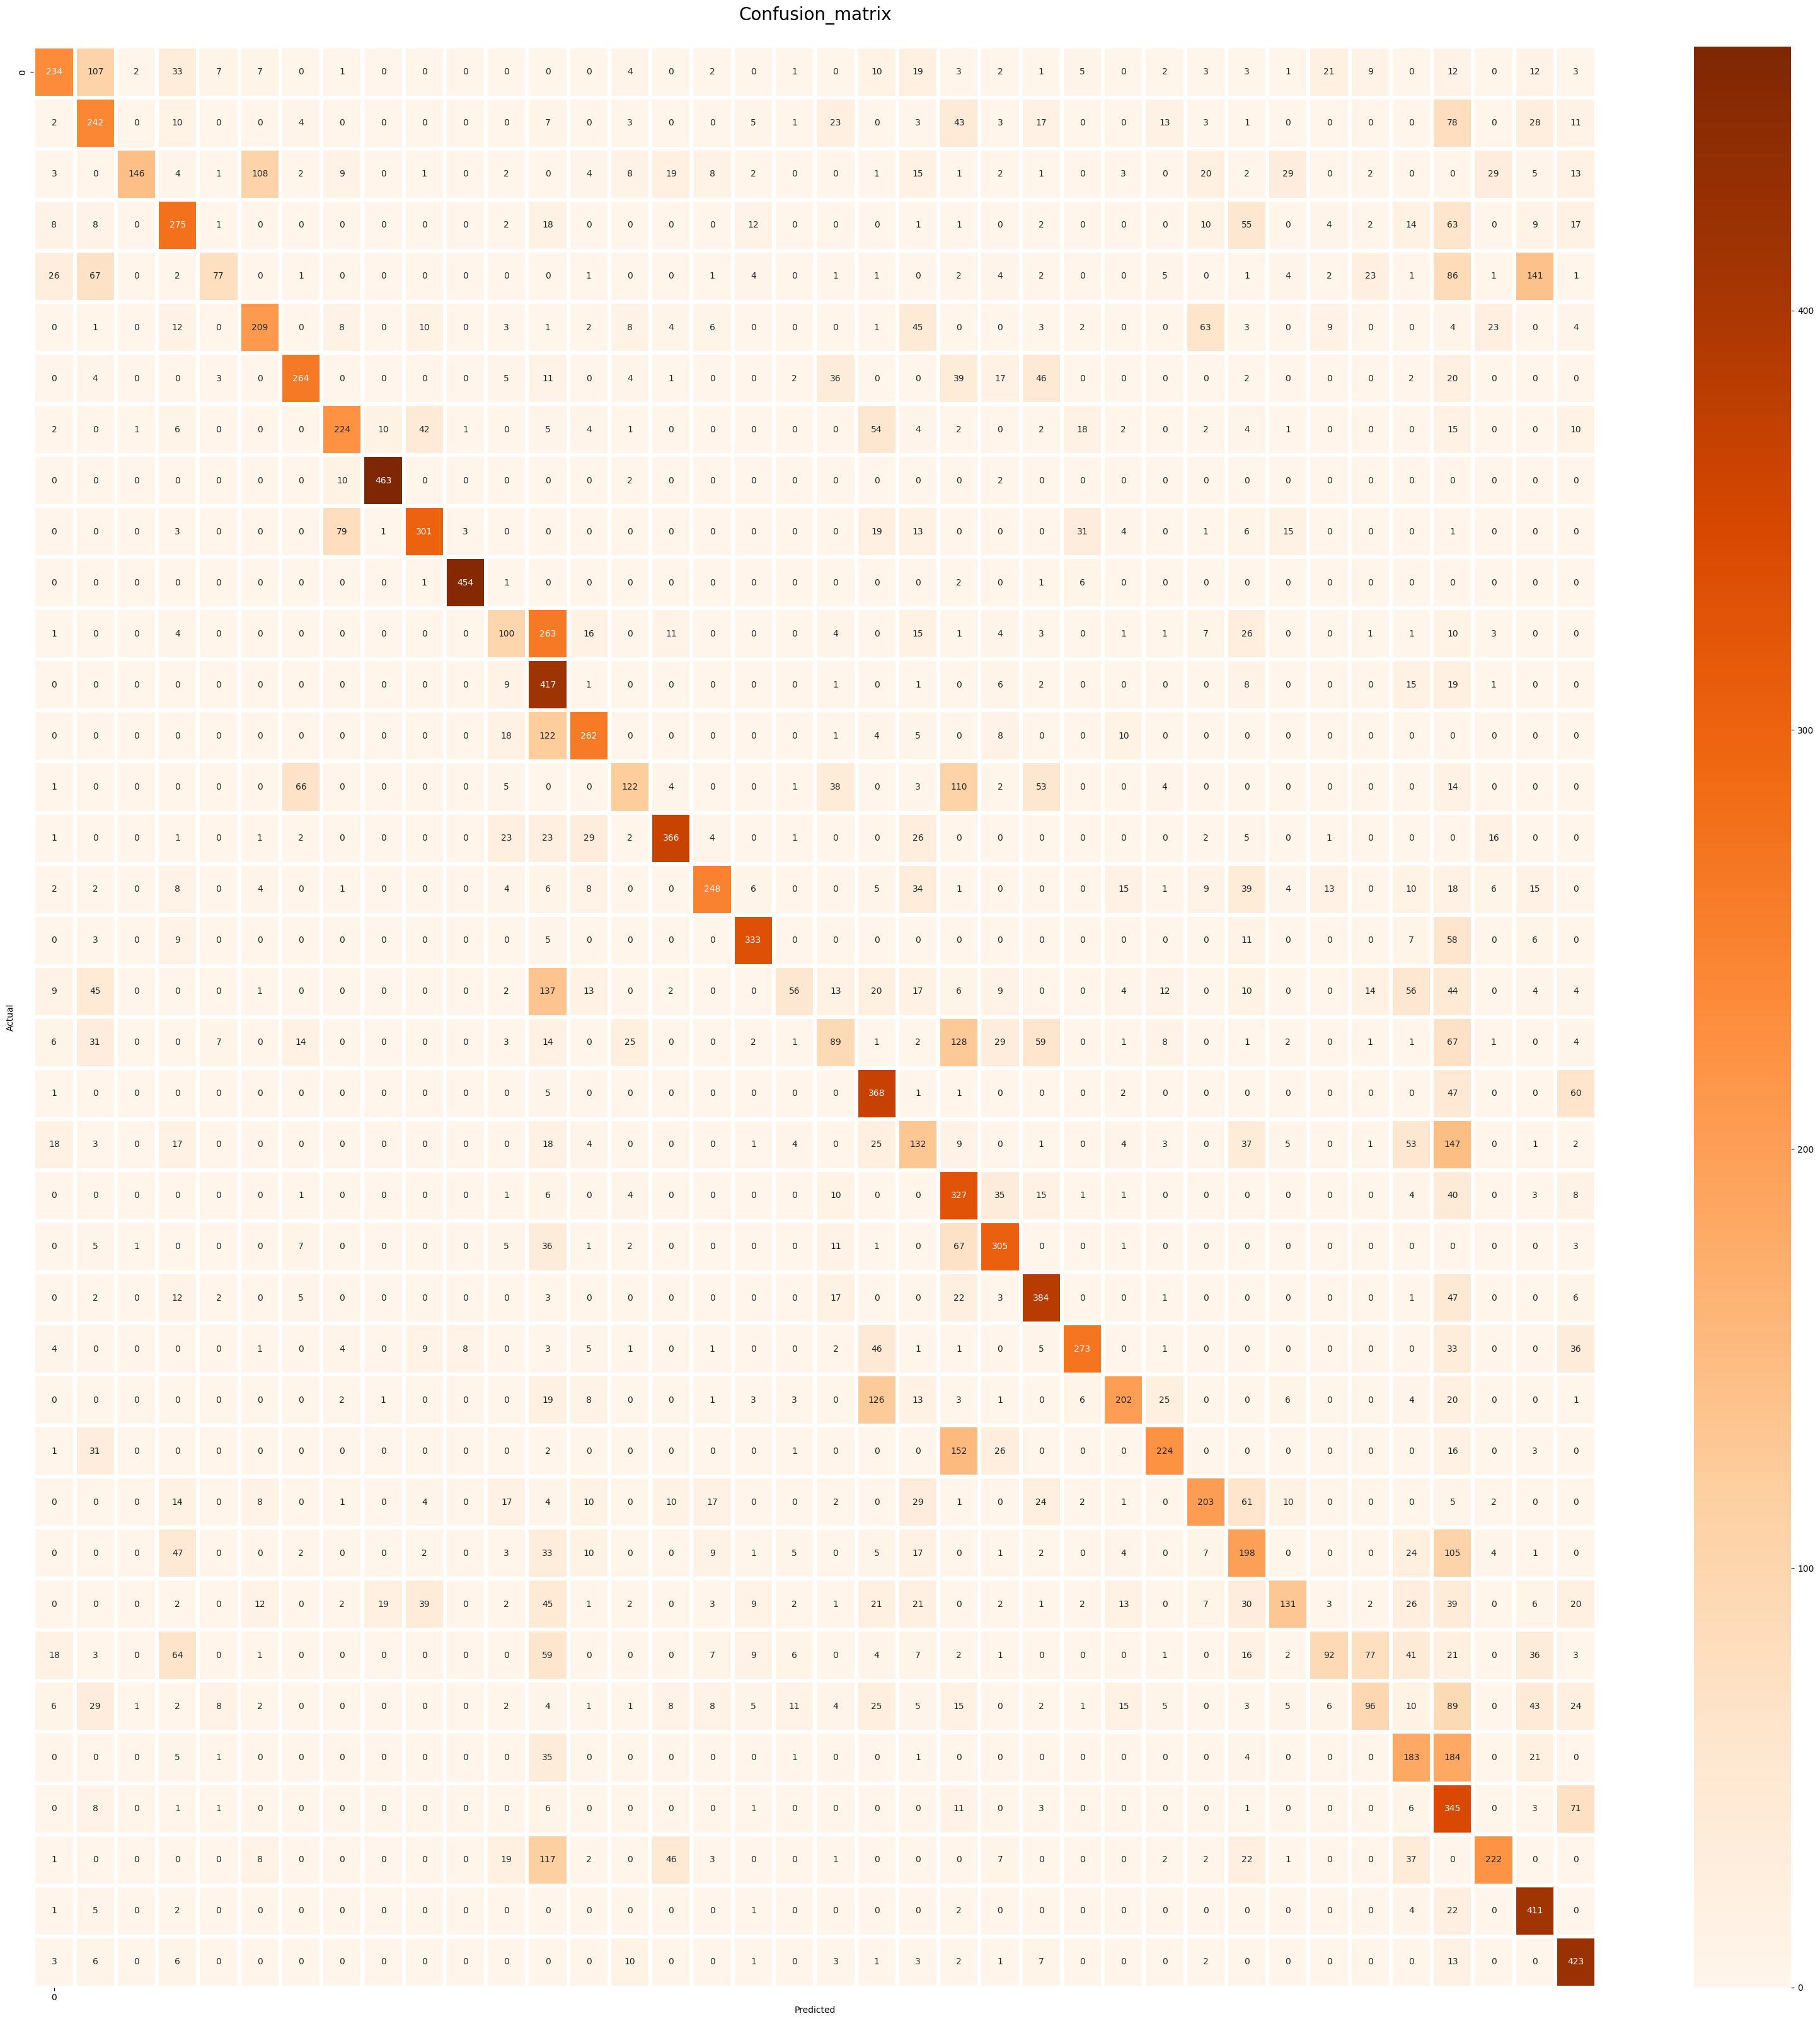

In [25]:
plt.figure(figsize=(40,40))
class_names=38
cm= confusion_matrix(test_data_generator.classes,final_predict)
sns.heatmap(cm,  annot=True ,fmt="d",cmap="Oranges",xticklabels=class_names,
            yticklabels=class_names,linewidth=4)
plt.title("Confusion_matrix\n",fontsize=20,color="black")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [26]:
print(classification_report(test_data_generator.classes, final_predict,target_names=class_list))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.67      0.46      0.55       504
                                 Apple___Black_rot       0.40      0.49      0.44       497
                          Apple___Cedar_apple_rust       0.97      0.33      0.49       440
                                   Apple___healthy       0.51      0.55      0.53       502
                               Blueberry___healthy       0.71      0.17      0.27       454
          Cherry_(including_sour)___Powdery_mildew       0.58      0.50      0.53       421
                 Cherry_(including_sour)___healthy       0.72      0.58      0.64       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.66      0.55      0.60       410
                       Corn_(maize)___Common_rust_       0.94      0.97      0.95       477
               Corn_(maize)___Northern_Leaf_Blight       0.74      0.63      0.

# Model Prediction

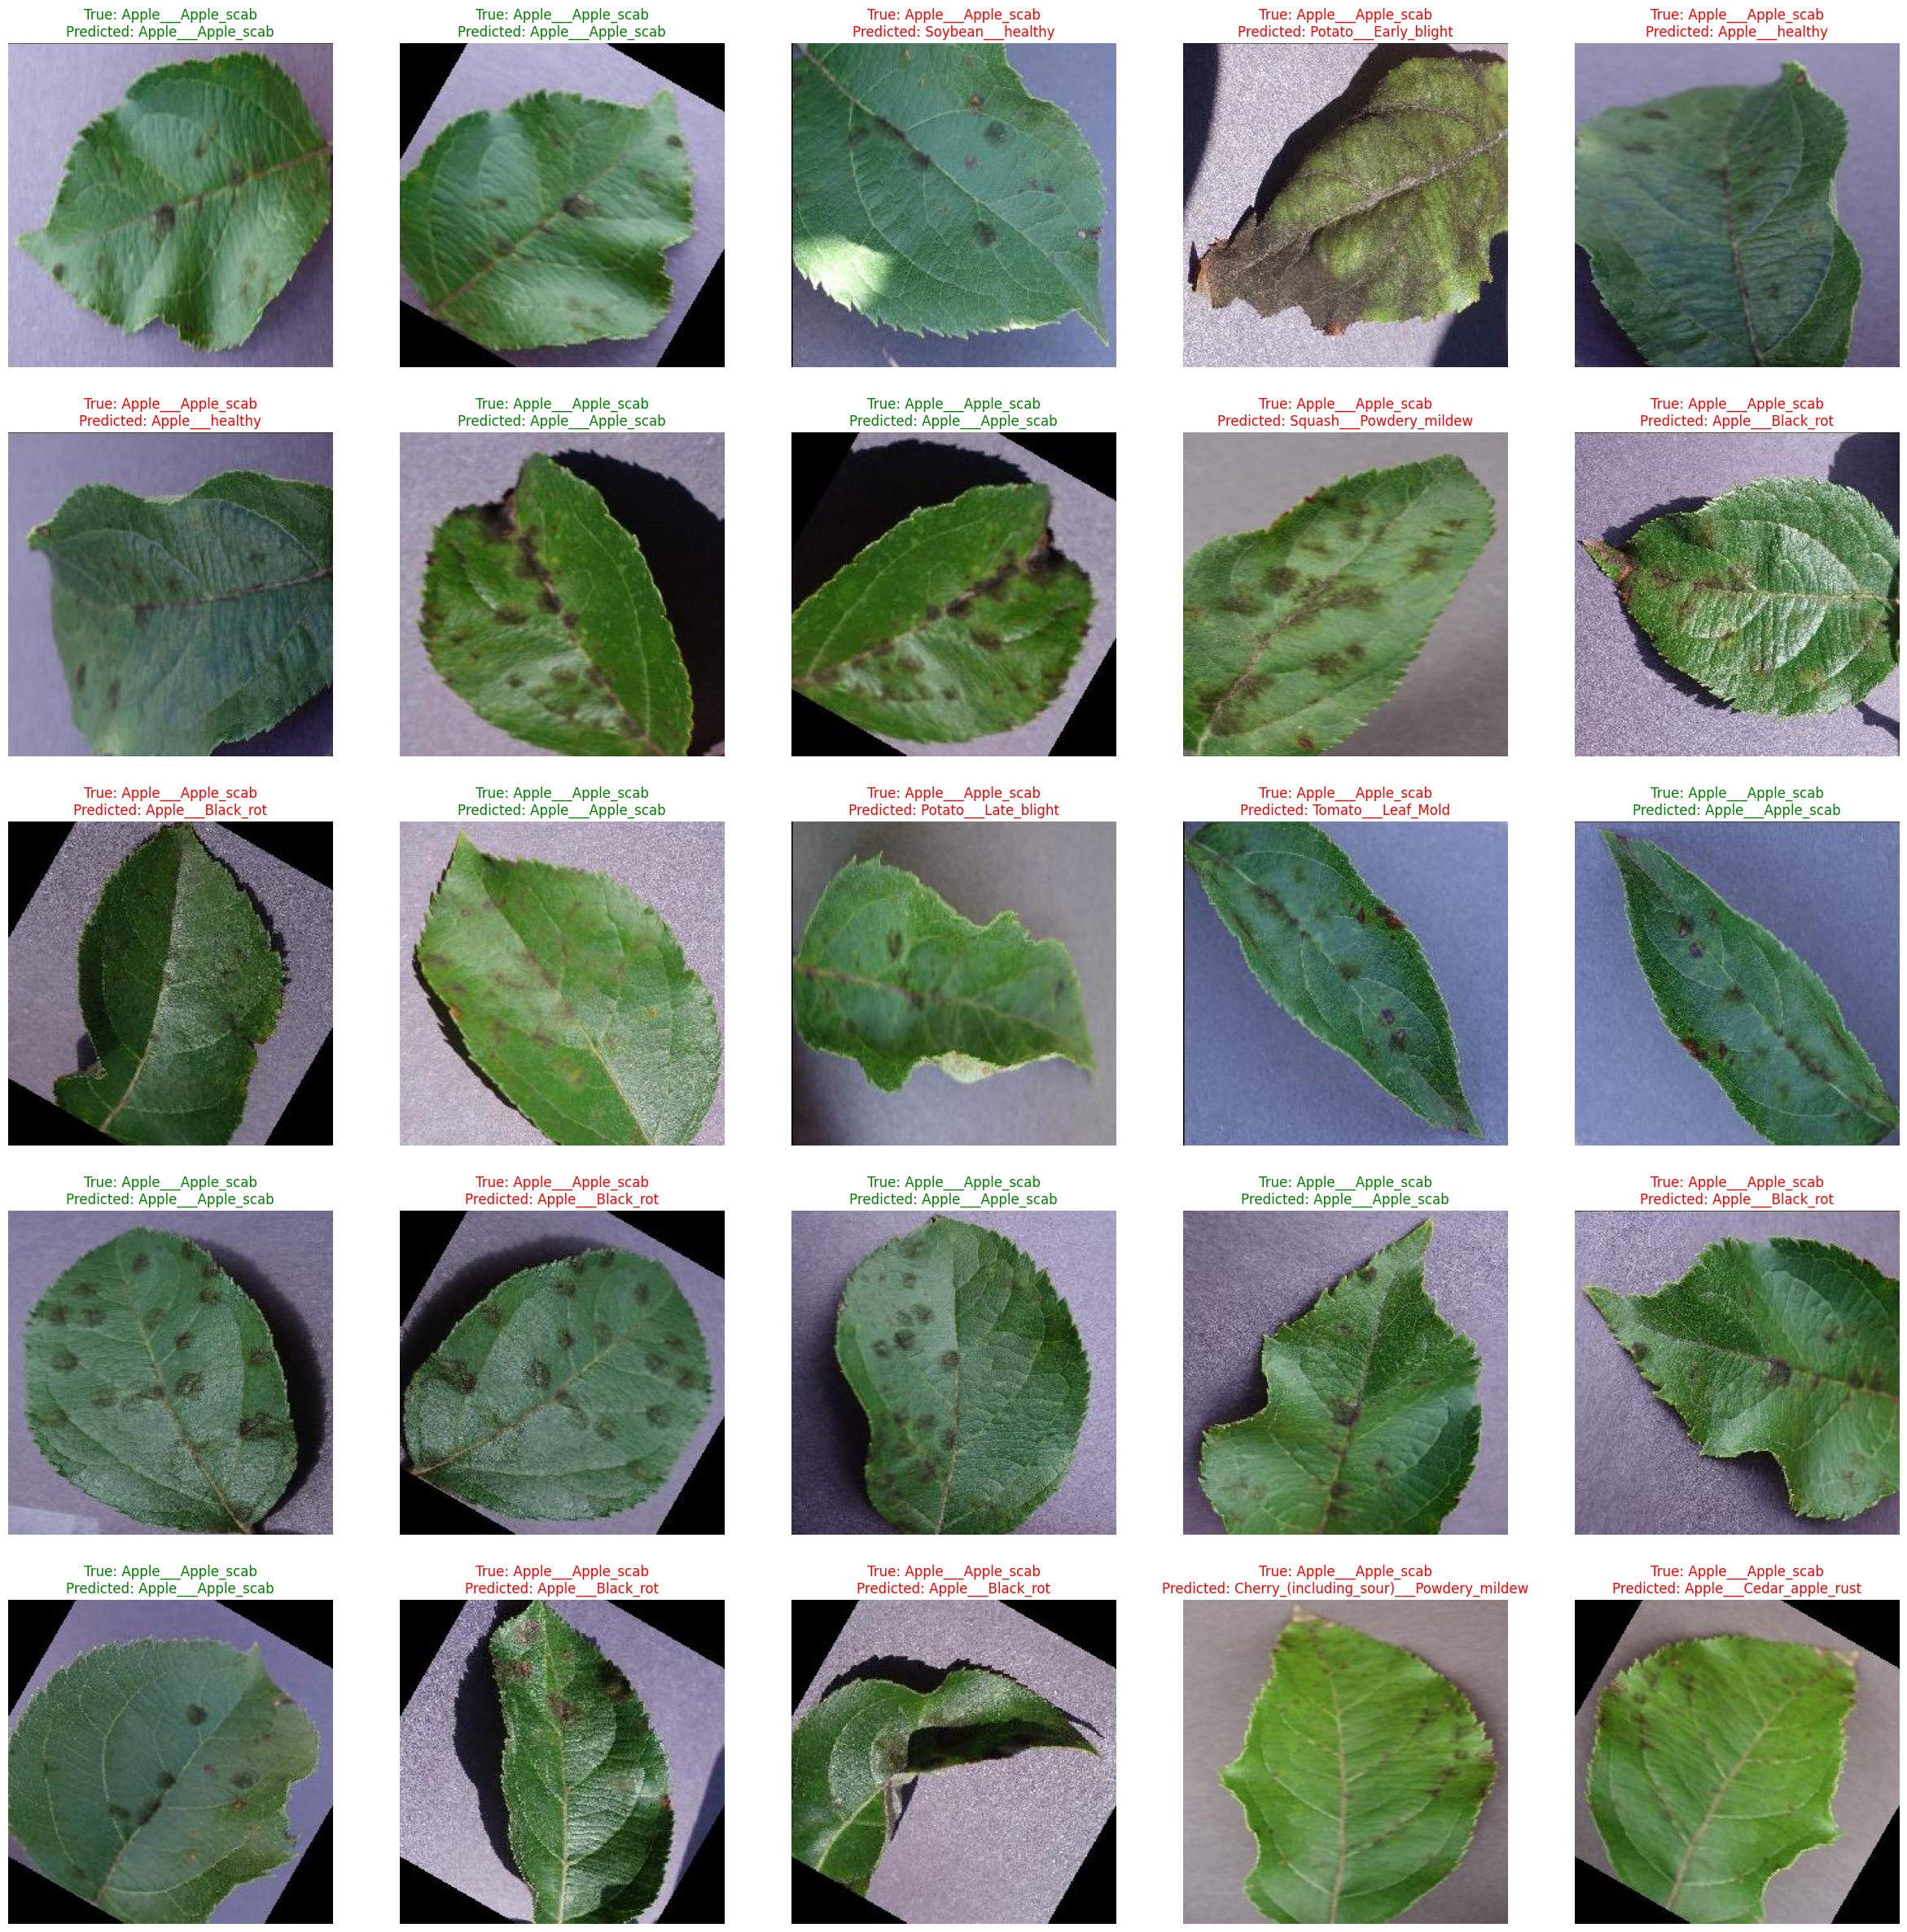

In [27]:
class_name = list(test_data_generator.class_indices.keys())

plt.figure(figsize=(30,30))
number_images=(5,5)
for i in range(1,(number_images[0]*number_images[1])+1):
    plt.subplot(number_images[0],number_images[1],i)
    plt.axis("off")
    
    true_label = class_name[test_data_generator.classes[i]]
    predicted_label = class_name[final_predict[i]]
    
    color="green"
    if true_label != predicted_label:
        color="red"
    
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
    plt.imshow(plt.imread(test_data_generator.filepaths[i]))
plt.show()


# Read Images From Online

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class: Corn_(maize)___healthy
Probability: 0.90


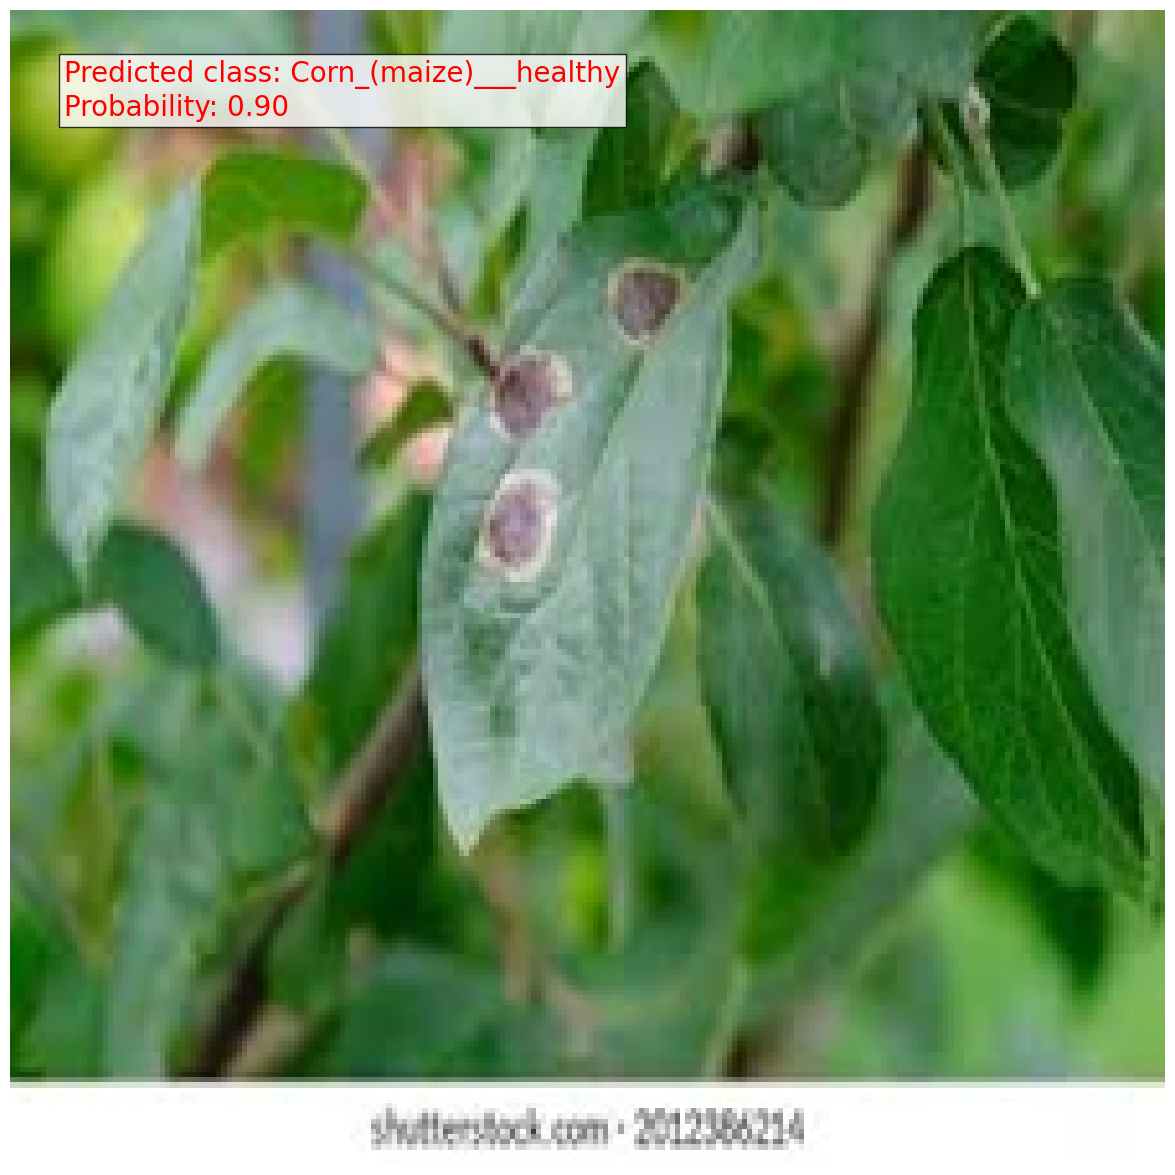

In [30]:
import base64
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import urllib

# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Extract class names from the data generator
class_names = list(train_data_generator.class_indices.keys())


img_base64 ="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTEhMWFhMXGBYVFRUXFxUVFxUXFRUWFhUVFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0mICUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLTctLf/AABEIALoBDwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQMGAAECB//EAEMQAAECBAQCBwYEBQEHBQAAAAEAAgMEESEFEjFBUWEGEyJxgZHRBzKhscHwFENTojNCUuHxIxYXRGJyksIVNFSCsv/EABoBAAMBAQEBAAAAAAAAAAAAAAIDBAABBQb/xAAlEQACAgICAgICAwEAAAAAAAAAAQIRAyESMQRBE1EiYRQjMgX/2gAMAwEAAhEDEQA/ABRidT2WJnLw3PF20XGDwm8FZpcNovm4eXkbuyeOFPsQtlKaopkpatLJlOwW5TRJoGIhtWmtPNelh8iM+9MzwqPYS1gGy7o1LpvGWNGhJ7kDD6QMJ7VgqfkiA8M0rofE00UMVwcEsfjUPZy1LzwcbX3ROcfQC3pEMWFR+inBRMuRFJ0qNkMWEVBTvHmnaKGmkkxViDXahSw4+dldxYpnElwWpOAGkjZeZ/0cU1LkvYKuywYVDBDXHgmjnpPh0YBrRVGPmBtqn+NSxoXLs6mHaKPriRXjWncgvxZcS0DxKXuxXM8Q2DtHs91OKJzSAsscq3MS7hp3qaI4AVXMs5oaGg6fZP18VXukeOiGKi+zG6Zj/UeSJy4oJtJBs9AMQUNmn4pO7DcqrsCYfEiZ4jyX3Lb0Dd6NA0Vsw+e6wUd7415jipMmNZezifsHl4FLeKKfw+xyCnEPU9wQ8ZwbqUcYqEaAlfYC+HU1URYSfmpHT7AdfDvUT5qtaC3FElYFWDPbc7KeCwKM+7U3uQR3UKkhObrpRMgmFGDRj4a5ezlruunzGQBz97V/t3Lps7DLgzN260A38Edqw+LFs9FbDPbrT+kWLjwrsNbpRGxN5NQcgGgboPHU+Ka9LcHc2kbNmYQAaaMd/S4aip3+W9Xex1NLctEiUdnZRfQ+kOkDQ8B+hsXcDzCeYZFDogcT2a1qqE2GrX0c7MJubmR3VsuNJBxk4xpF5mYwItol8R9bpcY/AqdkS10PDkb5LNYdiCfS2IKkw5Z7dNEXJzTnHKF4s8TTuIUMtdlrnMStQIeWlyQSUThuFk0JTd0oGjRO8XTuRTCSb2Vp0hndfRQTmAjUJ7Dhkuoh8biGHDsaEmhPAX0XouT4OdaRR/IhFUVX8CGOuGnkSmrJtuWgDRbQEJS8Dn5rRh8Lj71Ua8uS9ET8p3pIPgvIdUJzDiCKKGz9jxVWyLqFEcCKOI8U+Hn12t/aAl5HJ7RZy3KKFJo8pncaJhh806M0tcRUWDuPJS4fLHPlOq9CWSPkQTLMEFJX6BIWHktABu2wKBdOOhOyv14p3FcQXDeqUvli5/b8FIouOokvlQin+PYzw1mftU1ugsQwwtjmMwirmiovrShPDSnxTqShBrOAAuUPEiNf2hpsq+CemTvoXwosS4JHOm/eqdjc51sb/lbVrfDU+KuGLvyQYjhrlNN7mw+a8/hMoQk5XWgG2yaRiUcOF/knkjUNzm1a34DdV6E+jhrWoHFNPxLngNpRrQG0HED3ifNIlGUtIJSUSyyMyIjSauo0XJtXxVS6QYiOsFCaZriuyLM1EbDyB1G1Jq0VN9q/eqBgyTIjswGahqdRbWpG6qiklTHRyY66J5KMAR97BTtJNgVLEkif9RlL3oP5u47aKOGw60pqCDYrqdoS1bOwSGEa7gXrbevcppRtgTWh2K1Kyr4hysHedh3lPf8A0xrG9yCU+L0HGPorvSSYYIbWi8TMHA8KWoPAlLXsL2tiMtFhkW4gG3iD8Co8QdWOBzVlEmwDOG0Jpn4EGxJHGh+C0m9NjsmNRWgDEph0aUeW0AcWviN3JBAPkQ0+FVVRAcNB4hXWTlHQ3Oa6jmGoPyNuYQJwJzSRUUGh1JGxWv7ETnexNhsN7ntBFRvW4pvVNYxcTlboizLCFDOX3jqTqt4c9o1U+TckDtoPkpbs1Oy4EXVTR5wFtG7qCUlibeadetGX6BX4q0iic9HZcE5qKmS8PtBXnA4lAF5eaKjSR2Mrey5ydKIiPEa1t/BK5eZAC5iR6mp8OSb4uB5Hb6Q/5KR2076JH0hfmsNQ4DyDifmEziRaBCw2g3IBqSa+Q+i9Ly3WBpCltlc/CHV1vn5KaFKtoTqmU3DzFZI4c69dCvLxeM5lHxRik2IwBmy5fGqkfIbgppN4OWmoK4DCBcL04f8APxSVPTAlwb0T4bL0aGt8+abQm5SCdeKWykOpscpRhjOYO2239QuPFOcOH4v0NjnkqS6MaMzyDTkupyVZS+10FOvytESGa0NTTguMQxEGFUXLguSkowbYvLFN8kKek2KOLOrhmxsSNTyCYYZBIhtbwAryQWESwiNDqVcDQD6pvFeGNp3VPPl9ErxVKS5yEyjsQ4rFc8ZCKNNiOOlDXZKfwYA90eQVkiy5dcii7gwGAPLr5QMoPGu+yfLGuwVj5SpFLjwTw++5Sy9bB3h9+aeTsxE1zdmgtlba9CaU7lHIM61zw5jdPeDQKE6aWS3CUdjH4jW0wFkQ6BtSRSny++SZYdh/Vw3E+87tEcBQWRsrINabAc3UoTv5clFOzjbgX5cV1yUFc2LUaBn1o3uFvBESNzdLIc44v7QoE1iC1WpGPKpKkat2P4TRSyS9Io+VpDdUbhsQ5alJJiYESPTgiS+ylUlYmwXB3GJ1kQJvPzDWhwJoALkpjiU42BCMQitKANG5OgXn8wXxCXxHEk6A6eA2C7J0TzyOXZY42OQcxAf40cBtxCZ9ZmhhwvTWnDj98VSo8vV7xwNRxprZMejOIuhxAx5rBeC124bb3uNBv3oG7QtdtDKafVqRzEQ1uaJtGmspcIZD2V7LiDp3cUknJguNwPL+6VCM32GsjSob4c4khNIcSholWHRwIZcG3HCptx+KD/HuLiaopXFDE1GNg7ZgBWPB56tAEqfgllYOhOAuFYsT3dGDjxckrFHM6QElH0WWUYaXRrYXkiBCA3otTLCWUBpXXuC9SGJQjSNQqn65sugI7PjuhXzIFGNvsOaj6QTmQW94jI0d+p8vmu+jMgf4j/BR+RCWXIscevZk2mHSsoQKu1RzXACpIAUWJTIY2p8BxVJxKdc91XHubWwTMmaHjpRirDdtWy7xIjHaOB8VDFhDwVHk3urrRO4c29os7zVOCTyw5HKG4Y2o22RczCitGlQocLlet/iG3K1EfjmKCVYMzg/YN/mQZZ1tl2PB/W3MTTWHupnb2TuNj3hII85DY5rIjSMxpUe6E8k+lzIhyRWZQdCPqh5vCYcVhL6luwpflSqRBxyL7FNpa7RtzBCGVn81Da/lTiUQyTc27mkuOlLgeI3SKO2PBPVNcSWkFzzckEWaOQTPB41CHEbg8aHTTiFXCNLQT8dP2TOhE7Hj9VtkFpBBFiL7Ha456J3iLWvLXN7nGhA2467pJOxQ2wPjr4ovVkslwYNGw3MC3rATtQXoaVqDprtVESsg2G3K0W+Z4niVJhcqWgud7zrnkNh9f8Ik1qVxJvbClkclQDHBFANyPmqJMzLmxXgaZnWP/UVfpp/bqTZrcx/+t/oqJMQySXHUkk+Jqo/Ma1Yid+hnLvBbUiiPkJpuhKqcxOu0C5l4ruKixwlGXIb8lVotWI4mGA5SlXRxpiRHPOlUjxCOSacVbOj8HIwEKyU6VlMmnEg6bVpCFbVdbnRtD5V81XabcLffirH0idmLOWZx+ACQNh8dNTqlylbs8ubqRqZBa4OF6sb4dnKTy0W5SF2STq4/D7qtzF2tcNQXD/yHhc+SJYDlAGlGmg00p6ooml0dSxoMppSm+xrYinIKCO0VNuI8e4/RGNg6Hl62Uc3K2zDazvofp5JqTR1PQLIRjDcDQUI01Brr3omPh4/iQzVp1bu08OY5oRtuY3UjYpHuXtdv3quuKkqZ3laoaQsTuAQr/IghjQALAALzR0CrgOa9IkovYae5c8KKTbGRDYcEm7jRcRo9RpSnyRLa5a68j8UDEoe5V5JcUNhHk6K9NyZizDSdK2G3M/fAK0xHiGzkAluW9VHPMe5tKpEE0rLsnjq1QuxGfz1Nb/JV9wqUZOS5CFhP4rz/ACMcpT0BmhbUV0ES0KhRpKgl3Aoshex4kOOOhOSCiyYY71Iytu/4DvQrZGNOxM7jQcToO4IqSwxjyaitdUwnJ9ks0ctgos+Nuf5dBLJf+uiaH0Nl2ML4j3OoK2tfYDxojmgFobUZQAKce9KJXGhMCxOUG9a3IvRGdeKaHwBp8FTghGKtI5mnBuodGsXgsfRzaMfYGgs7avIqTD5EMqSe0e625pbVTy4hN7cbMXatbplHFwp73LYI+UdDiNJDCOYJPGhTrC/scRdNRteHBK5eBndUiwp3F39tUdMQiK8K2Ole4LuXaG0A+ydT98lx70TNHIYsLVpr7nXU/NajuGVd9GK70hjkQohb7zqMBvS5qTXub8VRXxYjT2iSr70hgv6sUFrk950+CpzoVXdoGigzK3tAtMihtLxUih+ahiuLU8bKjUGo25JdiEvQKampGi1yoVSjS+KF6BKtDWCqpmAQ6vqrNPTFAGjfXuTMit0UZZUgDEoudxO23cPspdEFNN0XENd0K66FnmyduzloLmRBStKOp3Ghp4OJ8FqQng2jXe7seHI8l22Jko7W/hQaj4oOYYWuc03ANidabGvMUXYnV0W6BLhzQRp9CtOl6dxtTiN0q6LTpDjDOhqRy0qPqrDMNqrItSiOSTRWZyWLHUqaatPEcDzFwhXQ9xbmrDPQy5uUE1Gnfw8dPJKMnEfIHyS+hTVMJeaOB4K19HsTa4Bp1FgPkqt1dbrcKN1bg4GhBXMbWN2GpUXLGsb6trgNbAczSvlU/BVWH0hjA3oV3iMYxXAipqBxOyXGFfRE5cmE5yTtFjw/pCCaPFOeytUuwPbUXC82axWPotipY/q3HsnSux4J+OuinF5UnqQ2xTDwdkhj4cFc5p2bRK4mGkmqT5GN9w7KXNFUhwi0lF9amc9h2UVSaZAAVGCUo4rl2TTe7ZJExvqxRuvFI8TnHOFXGpWPhDVL5uJYrz5SlOXKRNKdl06PgQpZhOru34uPpTyRchMOjRQxtxdzhfQXpTnYU5oWIaMaG7NAprtRMMHgEDObE7ixta9vmr0nVIZDTRuDFdneIhzPBNRUDUnbin3R5oYHP1ABN7iu1EEJyGH/AOoA40sa5SL1saaWU0xiecBkICm4bQ+elkfJ1RZLNGtEeYuJPAHzp9/BRNdcfRFwgAKG/HhXf75JW09uhO9vsrfskZLDeSTcUqR8VuKKkDbiuGP7RBF8xvxv8VzMRad7qgd2/oglJRjbMlbB8Ummtdf3SMpHdoqtissQaimU3B5LJ2OXRHE11IHIBGNe1zAx2h0P9JUqlewZT5NgUidj8ENi0IkHLdbiQixxbXT4oqCMw5pvFSBjJp2L8DlC0VNipZx3bI7h8E1hMFK77pZiDv8AUrfQfAKacHFtsZn/AChyBX/fcuS0am/itPiLcGJWlP8AHml2Q2QzQ8gB/f4kriPRzWE1zBuU03yk0PkR4LcQ1Pqumsq11LGzmj/pBqPL5LlnUzeEikVprx5G7TqPSqtjH2B4qnyp7QdwIJHKtyOStktoFRiY7GyGI258fmh48uTcDX57/MFFx23Pep2wQ5lLDccqf5TmgqsUwIL4hA0CtWGYBBAq8ZjzXECUDRVDzeJFtgvMx5eH5ZAlFR7LLDgQG3axvkNlXekOHNcS+HY8OK6kJtztVPMReK9COb5IfihspRcaKiCR7wounuoQRtdOzLB5uEHiEuxhHeu8uKtk3EtWDzWdram9FYYEMEKiQo2VoLdE0w3GiN7J8JxZTDJWmOcbggMJXmM9OVce9XDpRj1YZay5PwXnTnVKV5Gdf5iwM87eg2I/soCLDLrU1Uz4lqIySZlbnf4KNXJ0gMcOTLhBhEtBqBYbIKbm3Mf2d9NfGtEywp+eDDeNC0afH4oaakiTW/xr8V6UlrQUlWjUhEdFOWjCBvlaaDhcJ7LigytaGjXSle/mlEqACGi39R01HJN2sDRYk8zqV2PR1ELJkVALTXgUBH9/ehNf7hGuY4mhuNiQoojQTpX6X2WZjTW1cSOO6Bmpur7aNsPr8fkiI8UtbY9o1A+pQEKBRTZ/yVIyexXNgF7jpdbeBQeShnHBsRw8fNY5/lRch0A+zideLO4WPdxU+Fx2uOU7oGPEoDXuSyWn+qiVFyNjwK6pcWcT2WmLRpsf7pXPQ63Go05jcJe7EyTrrdGykXO2tdFzK+S0HzVNPoAOg8d1003vz57FdTzaHk7Te4UUDXzFT3Uoo2qI32RkrqG+gBGocDXnf4LgivLz8VskUI0uNfFY4aidh1R3tpwOnp4FWvDoocA7iBbgdwque0y+rauHcTcDu180VgU3ldkJsdO/7CdilTGxdFleztFTBtOGihrWiIbr98FYh0Qt8yCEtmYQcV1Eoh5iPQLzZYb3PoOUrJ4UyGtNNkLDxRrzqopS4dXdCQ8OvVdjmkq4rQMoy1RY5aMKISZaHGpQ0OC5u9lqI8qtuwb9Ez5kNtsuQ7IC4XB0Ub4IcuY9m5RohbpmvWweZiV8Umm2lrrp3AcD2SFy/D8zsztApIYnyYzi5pJC7D5Opzu90fFQ4rP5uyNNlLjOIhvZbokUR51OqtilBFKUcUT0/wBnsbPKZf6Hub4E5gP3J9Fhna3iAqX7KYv8dvHI4DuzNP8A+h5K/mEKaeaqxvlEnu9lclMPcIlaj3q6ndPnNPlZZDh0NUNM4hDhe+8N5EgE9zdT5Liaj2c6Jw40ug4gArud+7ZKJzpWwGjWEitybeQ80TBxhj2Zg008KoFmhJ0mdTTAJ6ao411+9FwyYS/FJjM8uAoLC+tt1DBmaKGbfJnecfR30iYS1sQfym/cgoUzWndRNYrg+G5vEEfBJZOFSztRqjxMXNbs5nIqVTVK142PeE0nhRLXCrTW+6KTArYO11vryR2GPOemxCVjVNMDhVcSdrBcZmPoku0sIO+h4cwkr4ZY6jtduB5g8E+yqSNKte0tdv5juRSxckclG+ivxKVJ31+uveoqVFOPu+H2dFPNS7mOyuvwI/mFtPH5qOK241sB98rqamnQjpkMCIQRTUeK5m4eWjm+6bjl/bbwU0ZlDXjf6UXbAHNym2tOR58rrqdMJP0OMExMRBR3vj48wrBDFl5q4uY7cOF+YIKv+ET2eG0nUgHkbX+qrxzrTHw7IBEO6jmGVWRY1LHwK7gzIAup8sbjS6Gxpsil7FY3tOsbBROi6kKTD4bhruk4VcqO5HoYZ7UWoUOrea7j2ANFjJllOBXoCtAzGaoeZXE7GcHVbug4hP8AO8eCmc03Rzg30bEYMcHjbY7jcLeK46BDoBQlRGZYRlY2p3cUkxIgv7kS72U45fD2QHtGpXDwNarT3qHMu7exEsjm7ZaOg851UTMNjccRuF6fP4mxkLOCDmALRu7/ABuvHcOj5NE9lsUrQHT5IVklG0gsco9MYYnOxol+seO5xb5USyXlCbmpPE3TtlCF1DghL4Nu2xuaFCSYknHRF4KxzQ4OTsNaAhYdC6gU+LM/n4oTx2KJp1CVBQFaxokE0SqVmnVVadtpi+mNauGimDR729LrmE6oW3AgLjSgrDsAnXgpW6xTCZF7LhkvXUIPlsBTViyHDJNALqxYbKZQFqXlgEUXFNgnJ2zvZNWi2Yh2UkrLF5vonQw9obZdyZeK0ZlNnI1TQj+yjZwPgfVPMQwuuyRzsm5qiWVuWxErvZI6Damp1HI96gdAI1FL6/M/JQQcRc2z7j4qZ2KtqKA+Sc4s5Rk5LdZWlnCp7x6prgrz+Hb/AFNJYa8v7FqibBzjO0Gm9PjZGwhSGBapJOlN6347rnL0OTFZna66fJSwJi99ClTBWyZwYFEWNMXjlJbDoUvS+yZS7qmpCXwYhFAmEEUCdghxbZRKaktBT3g2QM21rTQ66oplAK7pRijTENzYJmRt9GSsWTEyS4itkDEi9Y7I023KgxiMGWaboXBnmp+aHjxjyH8XGNj0tDW0CWOgFzu80RzKk0UzYNCKpd2T3bF09g5aLGpQQw59K0VmjRB3rQmhwTopfZ2co3orbILgbgpzI0pdG5gdljZcFBPG30LCJMmtjZGiKQVBIQAK3XTCHPLUPDZbqcEFxpkZaIDDIhD3E6IiJh7gai4W2yh4JX8dKfJE0uSe0LpxmcnghPwYCdfhCtulqXKppIBJsDlpegXE7EoKIxylnILcgqLpOVOSpBVortK6BFQYVNUSxoGgXcGXJK5DFT2cjBkY4BEMgAXcpBK5b0QkcuJujk/R3oZS8cDRNZaPUKvQkzkoiGcFxsGTGMRoKAnZIEI2q7DKqXhYB55i+HlpqBZKKXXpeISALTZVQ4OTE0tVOjLiqYG4jXAYZyhNnYaHkEjSvxU2FymVoTRoShqPN5CACcx8AmmYK2wvZRNtsJiB/wBr6/JFf7rpj9eF5P8ARVwxZFqgvhnXRR4bqvCa5aqywfZfMB1evheT/RMGez6MPzYf7vRPhCVbQUcU16KRPxQwKtTuIZQV6ji3s1mIoAbGhAjjn9EhmfYzNv8A+Kgf9sT0W+OfL9FGPHTtnlTILoz6Dcq6YZhLITO1rurhhHsijwR/Ggl3Gj/RSznsvnH/APEQR4RPRdnGT1RRpI89xONDYat1SyDGc91SbL0I+xiaJqZmCfCJ6ImH7IJkD/3EHyf6JfxSvoknGUukeeuXUNpXoA9kU1/8iD5P9EQz2UzI/Pg+T/RM+NiPhn9FAhLqLNBotqr472UzJ/Pg07n+i5f7JZg/nwfJ/oucZv0b4sn0UeWjl10ZAF67q4QfZTMN/Pg+T/RTt9mMwPzoXk/0RKD+g445+0IpNxIuo4kzTZWZvs3mBbr4f7/RdD2czFP40L9/otwb7Q9qUlRUnTFULGjFXQezWY/Whfv9Fy72ZzH60L9/oufG/oU8cylSoJNdggZ7FhnLRsvSf93EcMLRGhVO/b9EjgexyYDy4zEE15P9EHxysbDEq2VWTeXFPpZgVlgezSM382F+/wBESPZ/H/Vhfv8AREoSXoY1XRV4kMFCRZVXZvQKP+rD/f6Lp/QOMR/Fh/u9ECxzu2iV45t3R55GhUREgFdHezyOfzYX7/Rdw/Z9GH5sP93oinik1pAvFP6K9SykglWT/YaP+rD/AHeixvQaN+rD/d6LmLC12jLFL6K3FFQoYcmK1VtHQmN+pD/d6KZvQ6KPzGfu9FsnjX0d+GX0VhraLdVZH9DYv6jP3ei5/wBi436kP93opZeNk+jvxSLysWLF6xYYsWLFjGLFixYxixYsWMYsWLFjAOLxojGtMMVOdocA0uJbeoFLA6XNuY1SOHNTkJuXIXjK4tORxOdxiZGOvoMoqf8AmGllalyFjFV/ETrMxGZ5pQB0NwApMPD3dkEkiGWEAA1GlaFGQpqbq3MBQxGto2G6zTDYS/MTQDM5/vUs2gqbF+sWMVOVn50Q4YLHOdkZnLoTq+4Osia3cH1b1Yu4Co1R2GR5gPjZ2OLSc0ElrhnJa0EOB/hCtLaXJrYgPVtYxV42IzuXsQy52QEAwXNq7K/PWruzlcGAD+atq6hhIRpomIHhtQHdW4tLGkiJFYM1CagtbDdb+pOFgWMV7pA6N1gEExg7ITVrXGGRR9WNtl6w1BzONsjaalQw4sVrrumurMOYDWiG5zqZ2GE4ktJ6ygeBnNaUqKlWdaWMU+YM1kaYRmC/LE7Ja8BrXCNlGZ4GZzCYY7QzOytLT71e5ePNggPEYww2IBlY/rHAuiERAXEkOAbCa2G+ru3Uk0NLasWMVmXizALMhiuJhRqMiMiCGx5isMIPe5gJc1ucVcRXKNM1S6wXrOpaIubOC8HMQXEB7g0ki1xQowraxjaxYsWMYsWLFjGLFixYxi0trFjGltYsWMf/2Q=="


# Remove the data URL prefix and decode the base64 string
img_base64_cleaned = img_base64.split(",")[1]  # Remove 'data:image/jpeg;base64,' prefix
img_data = base64.b64decode(img_base64_cleaned)

# Open the image from the base64-encoded string
img = Image.open(io.BytesIO(img_data))

# Convert the image to the correct size and array format
img = img.resize((224, 224))  # Resize to match model input size
img_array = np.array(img)     # Convert to array

# Preprocess the image (expand dimensions and normalize)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.  # Normalize the image

# Predict the class probabilities
probs = model.predict(img_array)[0]

# Get the predicted class index and name
pred_class_prob = np.argmax(probs)
pred_class_name = class_names[pred_class_prob]

# Print the predicted class name and probability
print(f'Predicted class: {pred_class_name}')
print(f'Probability: {probs[pred_class_prob]:.2f}')

# Display the image with the predicted class and probability
plt.imshow(img_array[0])
plt.axis('off')
plt.text(10, 20, f'Predicted class: {pred_class_name}\nProbability: {probs[pred_class_prob]:.2f}', fontsize=20, color='red', bbox=dict(facecolor='white', alpha=0.8))
plt.show()
